In [1]:
from scipy.stats import multivariate_normal
from scipy.integrate import trapz, simps
import matplotlib as mpl
import numpy as np
import pylab as plt
from scipy.spatial import Delaunay
from scipy.stats import norm

%matplotlib inline

0.8868221548913503 0.8937462064522911
Bayes Error= 0.10971581932817931


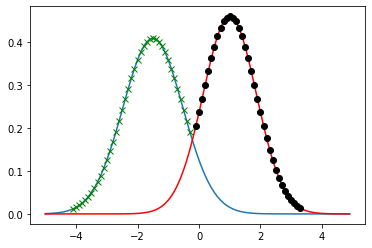

In [3]:
x = np.linspace(-5, 5, 100, endpoint=False)
y0 = np.array(multivariate_normal.pdf(x, mean=-1.5, cov=0.95))
y1 = np.array(multivariate_normal.pdf(x, mean=1, cov=0.75))
plt.plot(x, y0);
plt.plot(x, y1,'r');

plt.plot(x[y0>y1+0.01],y0[y0>y1+0.01],'xg')
a0=trapz(y0[y0>y1+0.01], x[y0>y1+0.01])
plt.plot(x[y1>y0+0.01],y1[y1>y0+0.01],'ok')
a1=trapz(y1[y1>y0+0.01], x[y1>y0+0.01])
print(a0,a1)
print('Bayes Error=',1-0.5*(a0+a1))

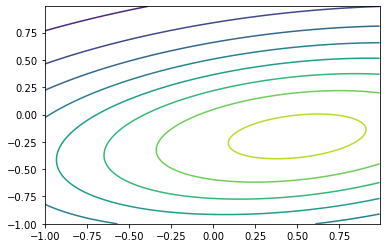

In [4]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv0 = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contour(x, y, rv0.pdf(pos))

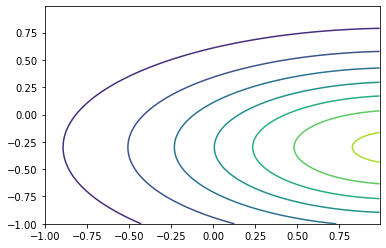

In [5]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv1 = multivariate_normal([1.1, -0.3], [[1.0, 0], [0, 0.3]])
plt.contour(x, y, rv1.pdf(pos))

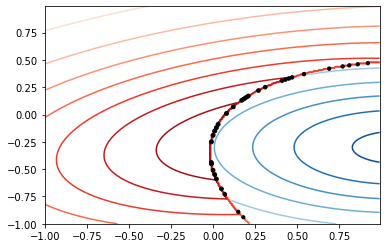

In [6]:
R0=rv0.pdf(pos)
R1=rv1.pdf(pos)

#print (R0-R1)*(R0-R1>0)
plt.contour(x, y,(R1)*(R1-R0>0),cmap='Blues')
plt.contour(x, y,(R0)*(R0-R1>0),cmap='Reds')
plt.scatter(x, y,100*(R1)*(abs(R1-R0)<0.0001),c='k',zorder=20)

In [7]:
# HW compute Bayes Error in the above case

In [8]:
# real example:

In [9]:
import pandas as pd
import seaborn as sns

In [11]:
df=pd.read_csv('../datasets/IPF.csv',index_col=0)

In [12]:
df

,patient_id,target,age_at_screening,predicted_risk,sex
0,P03315709202,1,65.019231,0.017774,M
1,P00206284301,1,78.480769,0.098397,M
2,P00221147701,1,58.461538,0.002911,M
3,P00225396403,1,62.903846,0.048803,M
4,P00240474302,1,82.480769,0.305629,M
...,...,...,...,...,...
248448,P00107369601,0,62.538462,0.001579,F
248449,P01085235802,0,55.923077,0.001869,F
248450,P00598188501,0,75.250000,0.002031,F
248451,P01864062801,0,56.403846,0.000924,F


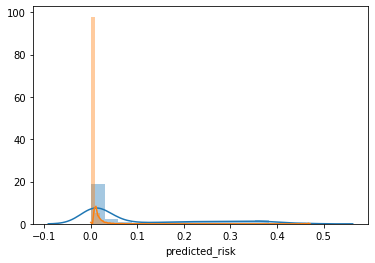

In [14]:
sns.distplot(df[df.target==1].predicted_risk)
sns.distplot(df[df.target==0].predicted_risk)
# compute the bayes error in this case
# Q. how is this any good? (it is! Hint: look at prevalence, and that the plots below are 'normalized')

In [16]:
# another example
df=pd.read_csv('../datasets/manic_FIRST.csv',index_col=0)
df

,patient_id,target,sex,predicted_risk
0,P03303564603,1,M,0.093423
1,P03308777303,1,M,0.061264
2,P03312053003,1,M,0.281049
3,P03315582603,1,M,0.080367
4,P03320110101,1,M,0.075302
...,...,...,...,...
246213,P01885639104,1,F,0.980221
246214,P26598185402,1,F,0.980654
246215,P26134878101,1,F,0.980654
246216,P02108305003,1,F,0.980085


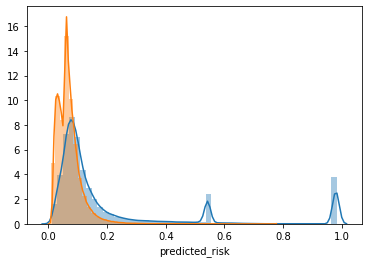

In [18]:
sns.distplot(df[df.target==1].predicted_risk)
sns.distplot(df[df.target==0].predicted_risk)